# 3: 
Previously we evaluated the thermodynamics of the two-state system for a fixed number of particles using the partition function. Now we will solve the two-level system for a variable number of particles using the grand partition function. Consider a system that may be unoccupied (with zero energy), or occupied by one particle in one of the two states that have energies 0 and $\epsilon$. The statement of the problem excludes anything beyond having 0 or 1 particle. The fugacity $z = e^{\beta \mu}$

## a: Show that the grand partition function is given by

$$
\mathcal{Z} = 1 + z + z\exp({-\beta \epsilon})
$$

The grand partition function is 

$\mathcal{Z} = \sum \limits_{\text{A. S. N. }} e^{-\beta E_{S,N}} e^{\beta \mu N}$

where A. S. N. represents all states and numbers. So the simplest state is the one where there simply is no particle, and hence, no energy. The first term in that sum is:

$$
e^{-\beta * 0} * e^{\beta \mu * 0} = 1
$$

And now we add one particle. The first factor will be the same in the ground state, but the number of particles has changed, and so therefore has the second term:

$$
e^{-\beta * 0} * e^{\beta \mu * 1} = e^{\beta \mu} = z
$$

and the last term has the same number of particles, but different energy. So it has the same second factor, but different first factor:

$$
e^{-\beta * \epsilon} * e^{\beta \mu * 1} = z \exp{(-\beta \epsilon)}
$$

and putting it all together, we have:

$$\mathcal{Z} = \sum \limits_{\text{A. S. N. }} e^{-\beta E_{S,N}} e^{\beta \mu N} = \boxed{ \mathcal{Z} = 1 + z + z\exp({-\beta \epsilon})
}$$

as desired.

## b: Determine the average occupancy $⟨N(z,V,T)⟩$.

From the definition of expectation, we have:

$$
\langle N\rangle = \frac{\sum{z^N} e^{-\beta \epsilon} N}{\mathcal{Z}}
$$

Expanding out, we see that the first term ($N=0$) goes to zero, and the nontrivial terms become:
$$
\frac{z + z^1 e^{-\beta \epsilon}}{\mathcal{Z}} = \frac{z + ze^{-\beta \epsilon}}{1 + z  +z e^{-\beta \epsilon}}$$

and in terms of $T$ and $z$, we have:

$$
\boxed{\left\langle N(z, V, T) \right\rangle  = \frac{z + z e^{-\epsilon /(kT)}}{1 + z + z e^{-\epsilon /(kT)}}}
$$

## c: Determine the average energy $U(z, V, T)$. Show that your result matches that obtained in the canonical ensemble.

$U = -\frac{d}{d \beta} \ln \mathcal{Z} = -\frac{d}{d \beta} \ln \left(1 + z + z \exp(-\beta \epsilon)\right)$
This simplifies to:

$$
U  = -\frac{z \epsilon  e^{-\beta  \epsilon }}{z e^{-\beta  \epsilon }+z+1}
$$

Now, how do we compare this to the energy of the canonical ensemble? The number of particles $N$ in the canonical ensemble is fixed, whereas here it varies. So we divide by $N$:

$$\frac{U}{N} = -\frac{z \epsilon  e^{-\beta  \epsilon } {\left(z e^{-\beta \epsilon }+z+1\right)}}{\left(z e^{-\beta \epsilon }+z\right) {\left(z e^{-\beta  \epsilon }+z+1\right)}} = -\frac{z \epsilon  e^{-\beta  \epsilon }}{\left(z e^{-\beta \epsilon }+z\right)} = -\frac{ \epsilon  e^{-\beta  \epsilon }}{\left( e^{-\beta \epsilon }+1\right)} = -\frac{\epsilon}{e^{\beta \epsilon} + 1}$$

which is the same as $\langle U \rangle$ for the canonical ensemble two-state system!

<!-- ## d:
Suppose that the two states can each be simultaneously occupied by one particle,
so that it is possible to have 2 particles total. Using the grand partition function,
evaluate the average energy. Explain any diﬀerence with your answer for part (b). -->

There is one more state to enumerate, where there are two particles and the energy is still $-\epsilon$. In that case, the contribution to the grand partition function will be $e^{\beta \epsilon} e^{2 \beta \mu}$, and the new grand partition function will be:

$$
\boxed{ \mathcal{Z} = 1 + z + z\exp({-\beta \epsilon}) + z^2 \exp{(-\beta \epsilon)}
}$$

Average energy is therefore

$$
U = -\frac{\partial}{\partial \beta} \ln \mathcal{Z} = -\frac{z^2 \epsilon  \left(-e^{-\beta  \epsilon }\right)-z \epsilon  e^{-\beta  \epsilon }}{z^2 e^{-\beta  \epsilon }+z e^{-\beta  \epsilon }+z+1},$$ which simplifies to 

$$
\frac{z \epsilon }{e^{\beta  \epsilon }+z}
$$

This new $U$ is necessarily larger than the $U$ from part (c). Here's how I prefer to think of it: we've added a new accessible state with energy $-\epsilon$, which was previously the largest (in magnitude) available state. Now while the probability space has gotten larger (i.e., the partition function has increased), the fact that we've added a state that was previously the highest energy means that the average energy will also increase. 


In [1]:
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import sympy as sp
from scipy.special import comb

# 4:

First, let's get the grand partition function:

In [3]:
z, beta, eps, n = sp.symbols('z beta epsilon n')

In [4]:
def state(n): 
    # state at given # of O2, weighted by degeneracy of state
    # distinguisability assumed
    return z**n * sp.E **(beta * n * eps) * sp.binomial(4, n)


In [5]:
grand_z = sp.summation(state(n), (n, 0, 4))

grand_z

z**4*exp(4*beta*epsilon) + 4*z**3*exp(3*beta*epsilon) + 6*z**2*exp(2*beta*epsilon) + 4*z*exp(beta*epsilon) + 1

This is the grand partition function!

## a: What is the probability that only one O$_\text{2}$ molecule will bind with a hemoglobin molecule? 

In [6]:
oxy_1_prob = state(n=1) / (grand_z)

In [7]:
oxy_1_prob

4*z*exp(beta*epsilon)/(z**4*exp(4*beta*epsilon) + 4*z**3*exp(3*beta*epsilon) + 6*z**2*exp(2*beta*epsilon) + 4*z*exp(beta*epsilon) + 1)

## Plot this as a function of the fugacity $z$.

In [8]:
# symbolic representation, with beta = eps = 1.0
oxy_1_prob_sym = oxy_1_prob.subs({beta: 1.0, eps: 1.0})
# numerical equivalent 
oxy_1_prob_num = sp.lambdify(z, oxy_1_prob_sym, "numpy")
z_vals = np.linspace(0.001, np.exp(2.5), 4000)  
P_vals_1 = oxy_1_prob_num(z_vals)

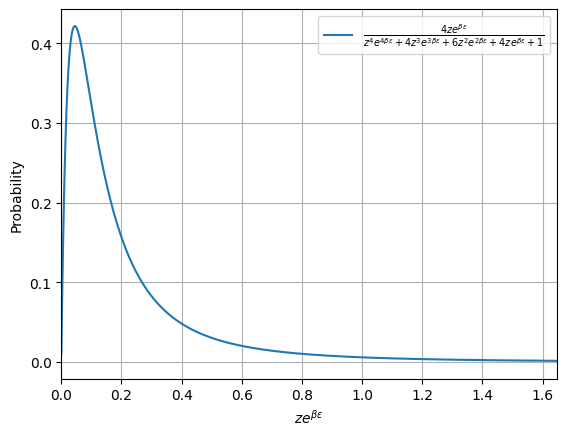

In [9]:
# note that on the x-scale we have to divide by e^{beta * eps} = e
plt.plot(z_vals/np.exp(1), P_vals_1, label=rf"${sp.latex(oxy_1_prob)}$")
plt.xlabel(r'$ze^{\beta \epsilon}$')
plt.ylabel('Probability')
plt.xlim(0, np.exp(0.5))
plt.legend()
plt.grid(True)
plt.show()

## b: What is the probability that four O$_\text{2}$ molecules will bind with a hemoglobinmolecule? 

In [10]:
oxy_4_prob = state(n=4) / (grand_z)

In [11]:
oxy_4_prob

z**4*exp(4*beta*epsilon)/(z**4*exp(4*beta*epsilon) + 4*z**3*exp(3*beta*epsilon) + 6*z**2*exp(2*beta*epsilon) + 4*z*exp(beta*epsilon) + 1)

## Plot this also. 

In [12]:
# same recipe as above
oxy_4_prob_sym = oxy_4_prob.subs({beta: 1.0, eps: 1.0})
oxy_4_prob_num = sp.lambdify(z, oxy_4_prob_sym, "numpy")

P_vals_4 = oxy_4_prob_num(z_vals)

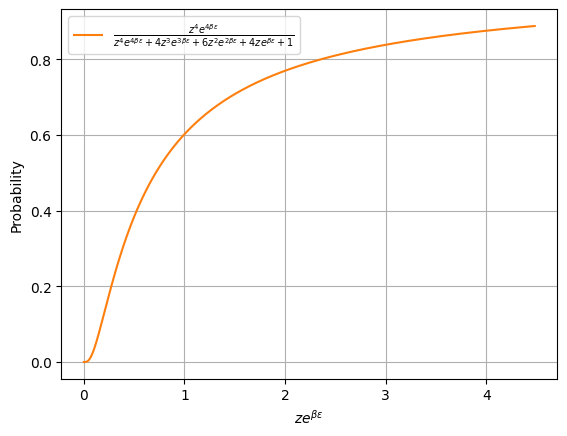

In [13]:
plt.plot(z_vals/np.exp(1), P_vals_4, label=rf"${sp.latex(oxy_4_prob)}$", color = 'tab:orange')

plt.xlabel(r'$ze^{\beta \epsilon}$')
plt.ylabel('Probability')
plt.legend()
plt.grid(True)
plt.show()

## c: Comparing the plots from the previous parts, do your results make sense? Explain.

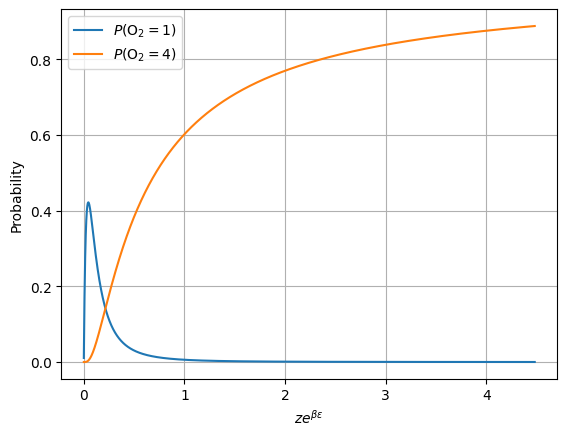

In [14]:
plt.plot(z_vals/np.exp(1), P_vals_1, label=r"$P(\text{O}_\text{2} = 1)$")
plt.plot(z_vals/np.exp(1), P_vals_4, label=r"$P(\text{O}_\text{2} = 4)$")
plt.xlabel(r'$ze^{\beta \epsilon}$')
plt.ylabel('Probability')
plt.legend()
plt.grid(True)
plt.show()

This plot indeed makes sense. First, think about the probability of exactly four molecules binding (orange curve). At higher fugacity, there will be a larger number of particles in the system. Hence, the hemoglobin will be more likely to bond with more oxygen molecules. As such, we see a monotonic increase $P(\text{O}_\text{2} = 4)$ with respect to $z$, as it approaches 1 at $z \to \infty$. 

On the other hand, the probability that exactly one molecule is bonded to the hemoglobin is much higher at lower fugacity (blue curve) has a maximum at low $z$. Lower fugacity implies that there are fewer molecules in the system, and hence, the likelihood of bonding with **exactly one** molecule is higher. 

### Bonus plot: let's plot $P(z)$ at constant $n_\text{bonded}$ for all five cases:

In [15]:
def prob_plot(num):
    oxy_n_prob = state(num) / (grand_z)
    oxy_n_prob_sym = oxy_n_prob.subs({beta: 1.0, eps: 1.0})
    oxy_n_prob_num = sp.lambdify(z, oxy_n_prob_sym, "numpy")
    P_vals_n = oxy_n_prob_num(z_vals)
    plt.plot(z_vals/np.exp(1), P_vals_n,label=f"$P(O_2 = {num})$")
    


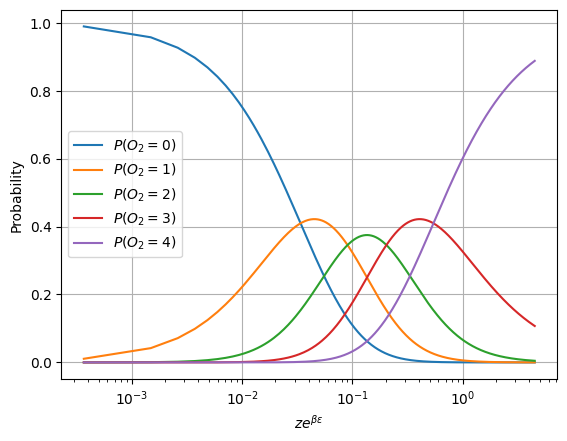

In [16]:
for n in range(0, 5):
    prob_plot(n)
plt.legend()
plt.xlabel(r'$ze^{\beta \epsilon}$')
plt.xscale("log")
plt.ylabel('Probability')
plt.legend()
plt.grid(True)
plt.show()

We can glean some intuition from looking at this plot. When $n_\text{bonded} = 0$, we see a maximum of $P= 1$ at zero fugacity. In other words, the only situation guaranteed to ensure there are no bonded molecules is to turn the fugacity down to zero (e.g., make sure there are no molecules at all!). 

From there, we see a gradual rightward trend in the location of maximum likelihood for higher  $n_\text{bonded} = 0$, for the reasons discussed above in part (c). 
